# EDA - Churn Modelling

Problem Statement - The dataset belongs to a financial company which offers its services in different countries such as credi card, small loans etc. From sometime they are witnessing that the customers are opting out of the services.

Our goal here is to understand the scenario by perform Exploratory data analysis (EDA) and analyse the data.

##### Dataset link - https://www.kaggle.com/datasets/shubh0799/churn-modelling

#### Description about each columns
1. CustomerId = Unique Id generated for each customer.
2. Surnmae = Lastname of the customer.
3. CreditScore = Credit Score of the customer.
4. Geography = Location where the customer is based off.
5. Gender = Gender of the customer.
6. Age = Age of the customer (Years).
7. Tenure = Association of the customer with the company in years.
8. Balance = Account balance of the customer (USD).
9. NumOfProducts = Number of financial services the customer is using.
10. HasCrCard = Whether the customer has the credit card (1=True,0=False).
11. IsActiveMember = Whether the customer uses the credit card (1=True,0=False).
12. EstimatedSalary = Estimated salary of the customer (USD).
13. Exited = Whether the customer has stopped the financial servies and the left the company (1=True,0=False).

In [37]:
# Importing the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('Churn_Modelling.csv',index_col=0)

In [3]:
#Showing the first 5 rows for general view.
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Overall summary of each columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


We can see fields - Surname, Geography & Gender are Categorical where are rest are Quantitative datatypes or Boolean .

In [39]:
#checking for duplicate values.
df.duplicated(subset=None).sum()

0

In [40]:
#checking for null values.
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In case we encounter null values we can perform various methods to rectify them.
Easiest of them would pe to replace them with mean values for quatitative data and mode for categorical data.

In [41]:
# Statistics about the data.
description = df.describe()
np.round(description,2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


As we can see statistical data for only quantitative data is to be considered like age, Estimated salary etc, not for boolean parameters such as HasCrCard , Exited etc.


## Visualization

1. Country wise distribution in data.

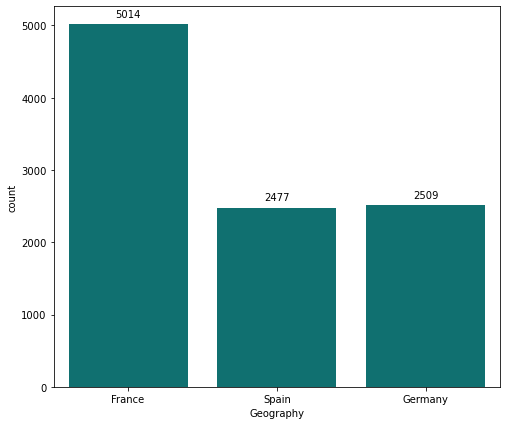

In [103]:
df['Geography'].value_counts()
plt.figure(figsize=(8, 7))

plot1 = sns.countplot(x = 'Geography' , data = df,color='teal');
# label each bar
for p in plot1.patches:
 height = p.get_height()
 plot1.text(x = p.get_x()+(p.get_width()/2), y = height+100, s = '{:.0f}'.format(height), ha = 'center')

We have data from three different countries.

2. Gender distribution in data.

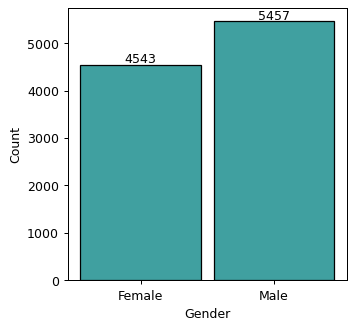

In [87]:
plt.figure(figsize=(4,4),dpi = 90)
plot2 = sns.histplot(df.Gender,color='teal', shrink = 0.9)
# label each bar
for p in plot2.patches:
 height = p.get_height()
 plot2.text(x = p.get_x()+(p.get_width()/2), y = height+50, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

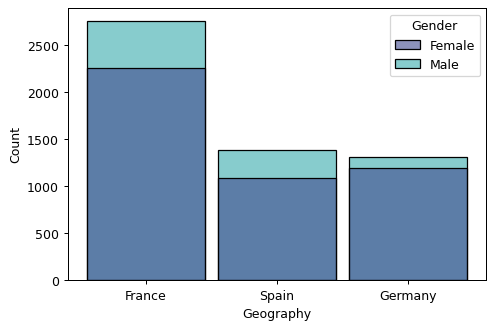

In [104]:
# How many male & female from each country.
plt.figure(dpi = 90)
plot3 = sns.histplot(df, x = 'Geography', hue = 'Gender', palette = 'mako', alpha = 0.6, shrink = 0.9)
plt.show()

3. Distribution between active & Passive members in data.

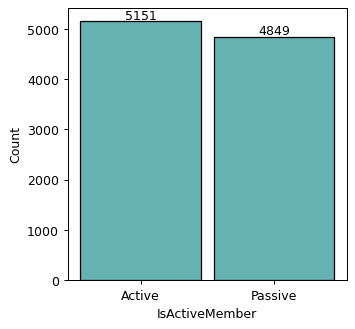

In [108]:
plt.figure(figsize=(4,4),dpi = 90)
active = df.IsActiveMember.map({1: 'Active', 0: 'Passive'})
plot4 = sns.histplot(active, color = 'teal', alpha = 0.6, shrink = 0.9)
# label each bar
for p in plot3.patches:
 height = p.get_height()
 plot4.text(x = p.get_x()+(p.get_width()/2), y = height+40, s = '{:.0f}'.format(height), ha = 'center')
plt.show()

4. Age distribution in data

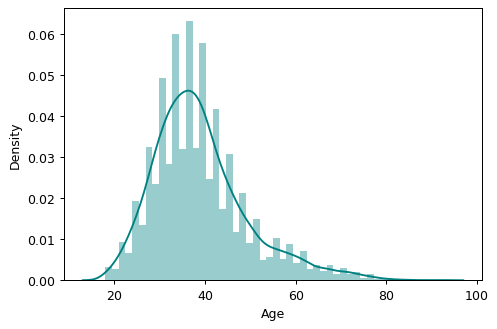

In [109]:
plt.figure(dpi = 90)
plot5 = sns.distplot(df.Age, color = 'teal')
plt.show()

The data is normally distributed.

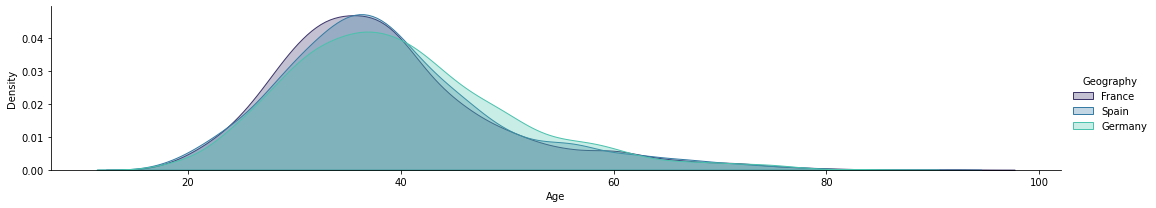

In [94]:
# Age distribution based on country
fig = sns.FacetGrid(df, aspect = 5, hue = 'Geography', palette = 'mako')
fig.map(sns.kdeplot, 'Age', shade = True, alpha = 0.3)
fig.add_legend()
plt.show()

5. Salary Distribution

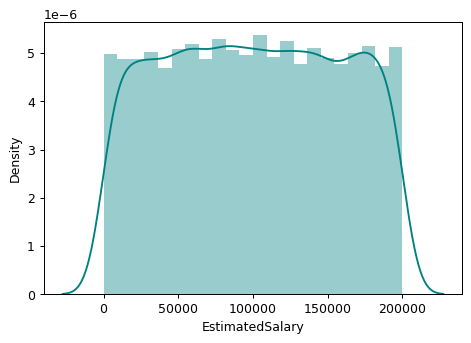

In [92]:
plt.figure(dpi = 90)
plot5 = sns.distplot(df.EstimatedSalary, color = 'teal')
plt.show()

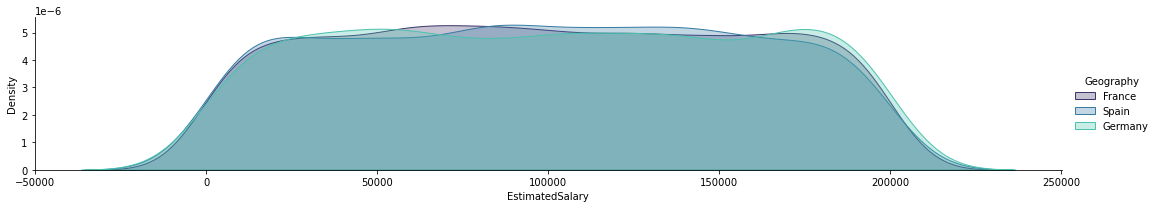

In [110]:
# salary distribution based on country
fig = sns.FacetGrid(df, aspect = 5, hue = 'Geography', palette = 'mako')
fig.map(sns.kdeplot, 'EstimatedSalary', shade = True, alpha = 0.3)
fig.add_legend()
plt.show()

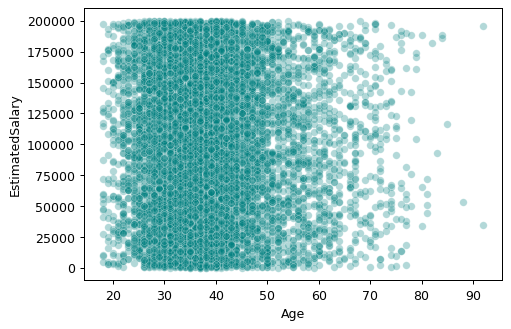

In [25]:
# Swarm Plot
plt.figure(dpi = 90)
sns.scatterplot(df.Age, df.EstimatedSalary, color = 'teal', alpha = 0.3)
plt.show()

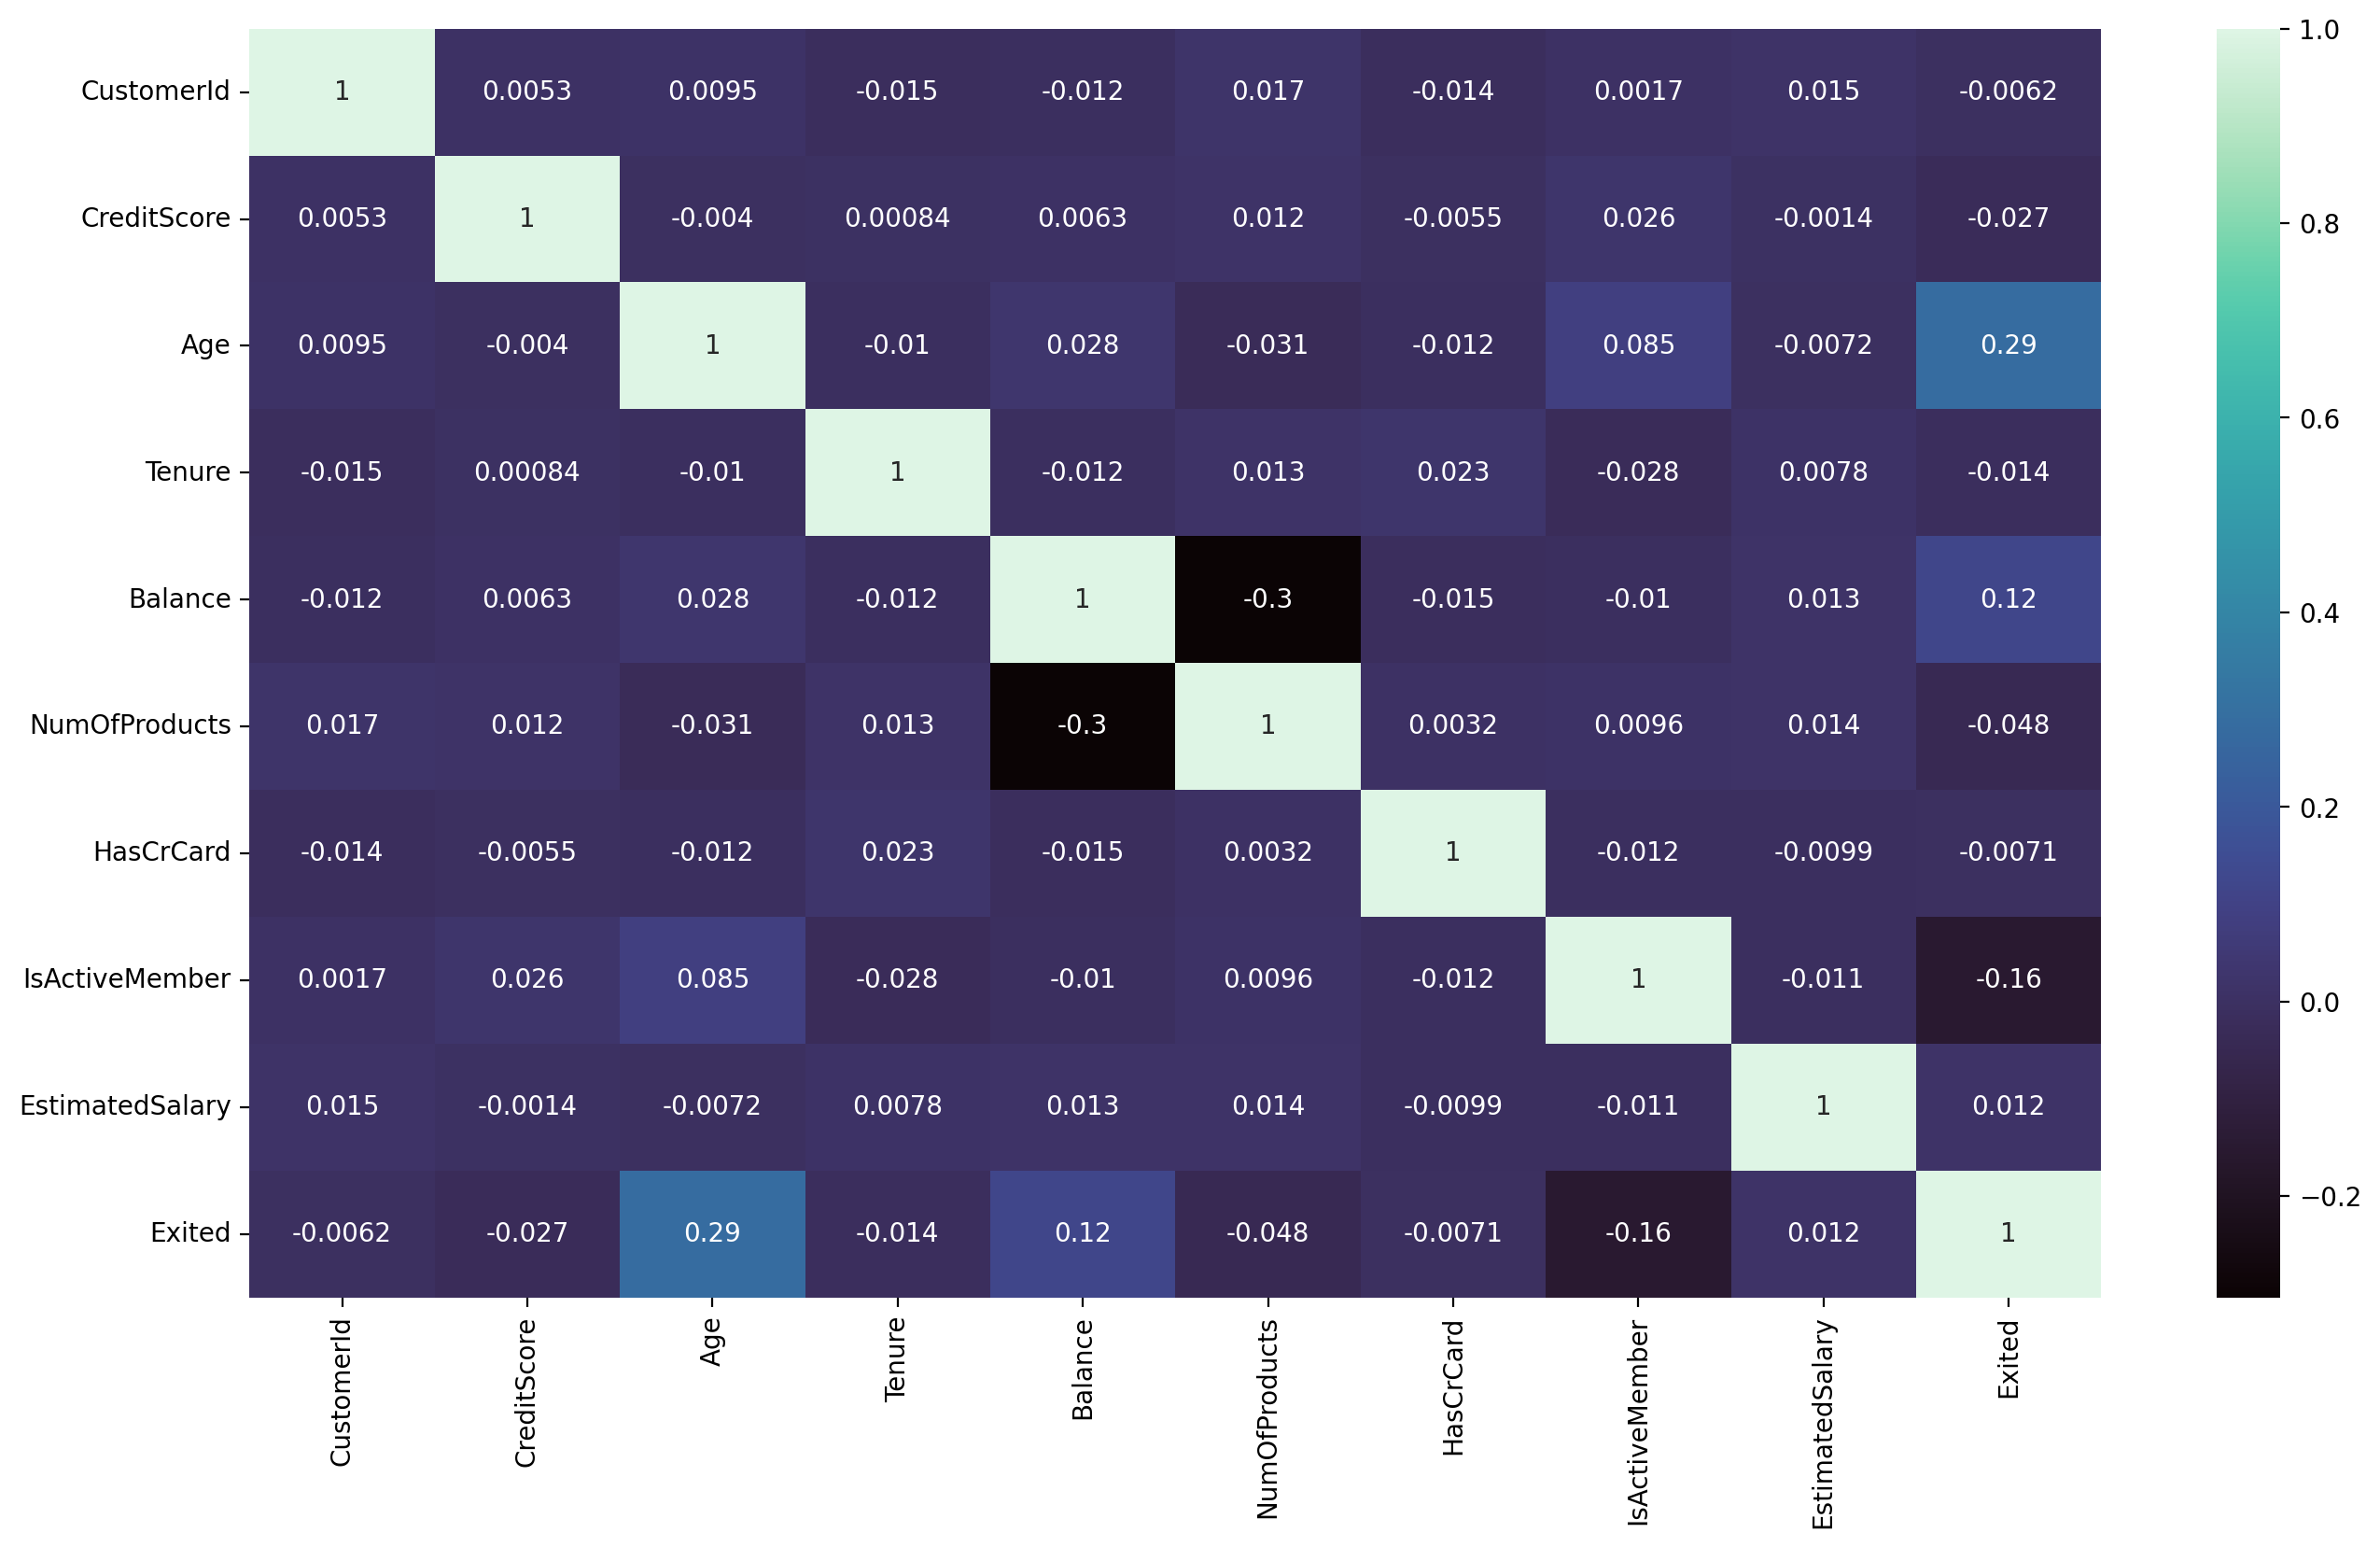

In [26]:
plt.figure(figsize = (16, 9), dpi = 200)
sns.heatmap(df.corr(), cmap = 'mako', annot = True)
plt.show()

<Figure size 864x576 with 0 Axes>

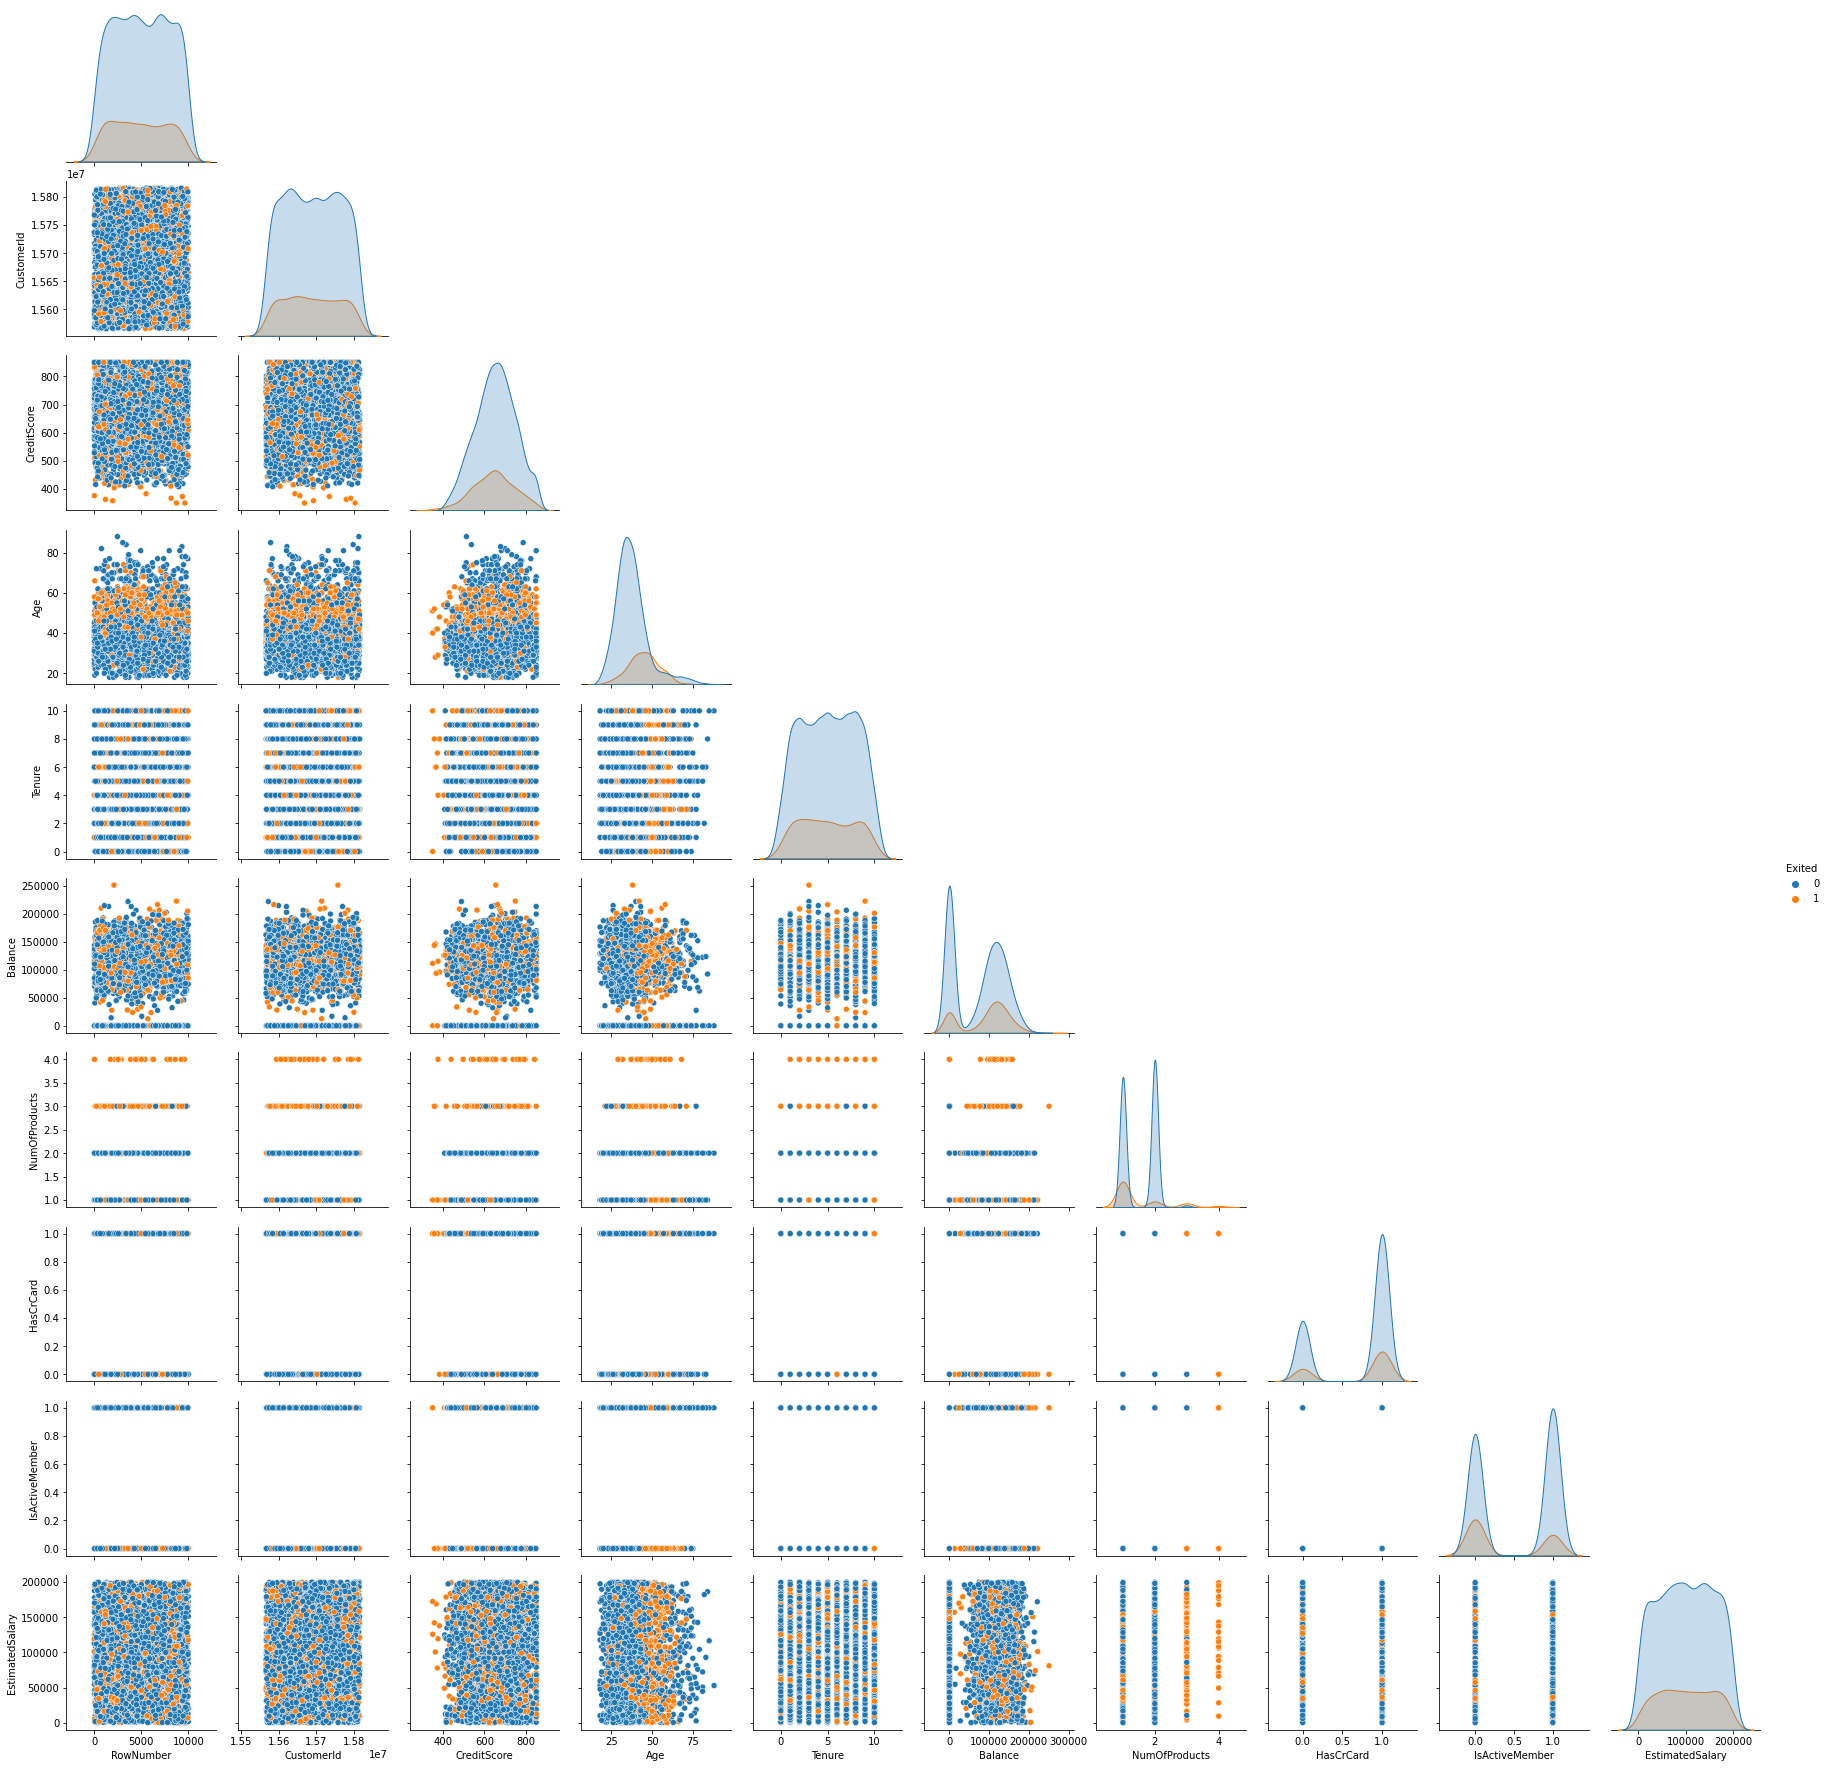

In [99]:
# Pairplot
data_random_sample = df.sample(frac = 0.4).reset_index()

plt.figure(figsize=(12, 8))
sns.pairplot(data_random_sample, corner = True, hue = 'Exited');

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         422.,  233.]),
 array([350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]),
 <BarContainer object of 11 artists>)

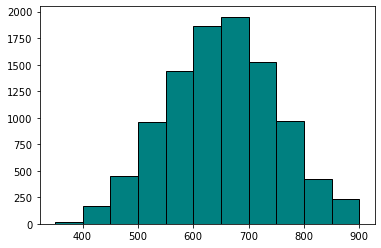

In [112]:
plt.hist(df['CreditScore'], bins=[350,400,450,500,550,600,650,700,750,800,850,900], edgecolor="black",color='teal')

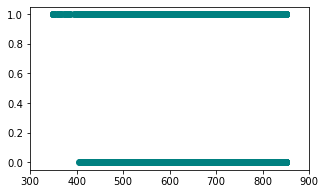

In [101]:
plt.figure(figsize=(5,3))
plt.xlim(300,900)
plt.scatter(x=df['CreditScore'], y=df['Exited'],color='teal')

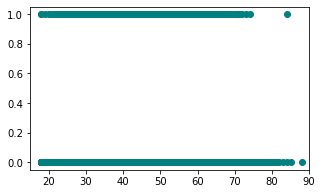

In [102]:
plt.figure(figsize=(5,3))
plt.xlim(15,90) 
plt.scatter(df['Age'], df['Exited'],color='teal' )

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

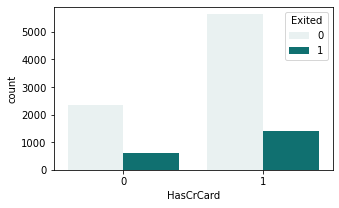

In [95]:
plt.figure(figsize=(5,3))
sns.countplot(df['HasCrCard'],hue=df['Exited'],color='teal')

People who have credit card had exicted in less number.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

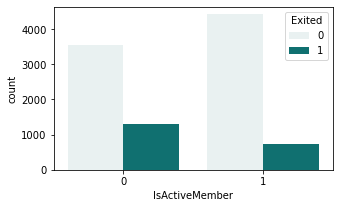

In [97]:
plt.figure(figsize=(5,3))
sns.countplot(df['IsActiveMember'],hue=df['Exited'],color='teal')

People who are active member of the credit card exicted less.

# Conclusion:

1. The dataset contains data majorly from France (Almost half).
2. Age and salary is normally distributed.
3. Age, Bank balance & Estimated salary has a positive correlation with Exited.
4. Majority of people who have the credit card didn't exited.